In [2]:
!pip install gymnasium "gymnasium[toy-text]" keyboard

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   -------- ------------------------------- 2.4/10.6 MB 11.2 MB/s eta 0:00:01
   -------------------- ------------------- 5.5/10.6 MB 12.9 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 16.6 MB/s eta 0:00:00


In [26]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import keyboard
import time

import pandas as pd
import seaborn as sns

In [15]:
##
env = gym.make("FrozenLake-v1",
               render_mode='human',
               map_name='4x4',
               is_slippery=False)

obs, _ = env.reset()

try:
    for i in range(1000):
        if keyboard.is_pressed('q'):
            break
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)

        if terminated or truncated:
            time.sleep(1)
            obs, info = env.reset()
finally:
    env.close()

## 확정적 환경 (Deterministic environment)

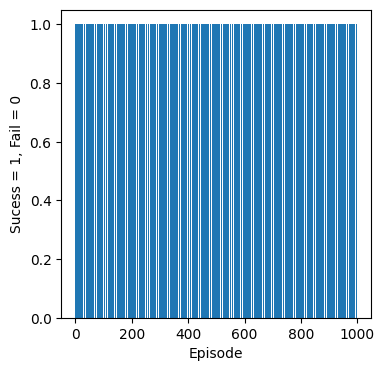

In [26]:
##
env = gym.make("FrozenLake-v1",
               desc=None,
            #    render_mode='human',
               map_name='4x4',
               is_slippery=False)

s, _ = env.reset()

## deterministic policy
policy = {0:1, 1:2, 2:1, 3:0, 4:1, 6:1, 8:2, 9:1, 10:1, 13:2, 14:2}

scores = []
stochastic = False

for i in range(1000):
  
  if i > 990:
    env = gym.make("FrozenLake-v1",
               desc=None,
               render_mode='human',
               map_name='4x4',
               is_slippery=False)
    
  terminated, truncated = False, False
  s, info = env.reset()
  score = 0

  if keyboard.is_pressed("q"):
    print("Exiting the environment.....")
    break

  while not terminated and not truncated:
    if stochastic:
      action = env.action_space.sample()
    else:
      action = policy[s]

    s_, reward, terminated, truncated, info = env.step(action)
    score += reward
    s = s_
  
  scores.append(score)

env.close()

plt.figure(figsize=(4, 4))
plt.bar(np.arange(len(scores)), scores)
plt.xlabel('Episode')
plt.ylabel('Sucess = 1, Fail = 0')
plt.show()

[np.int64(1), np.int64(1), np.int64(2), np.int64(2), np.int64(3), np.int64(1), np.int64(1), np.int64(2)]
[np.int64(0), np.int64(3), np.int64(1), np.int64(1), np.int64(2), np.int64(2), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(2), np.int64(1), np.int64(2)]


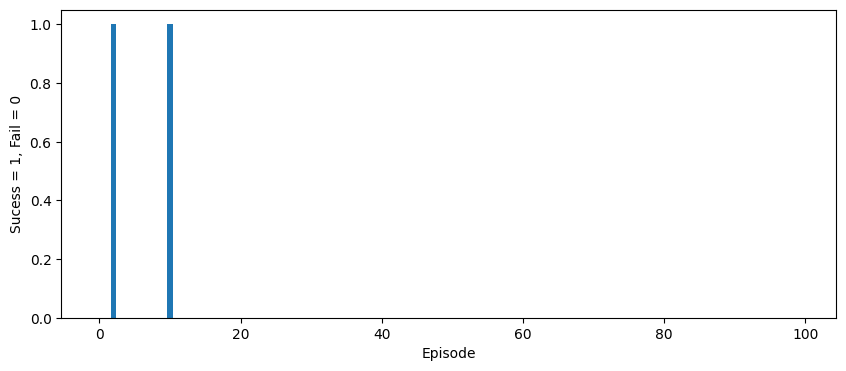

In [53]:
##
env = gym.make("FrozenLake-v1",
               desc=None,
            #    render_mode='human',
               map_name='4x4',
               is_slippery=False)

s, _ = env.reset()

## deterministic policy
policy = {0:1, 1:2, 2:1, 3:0, 4:1, 6:1, 8:2, 9:1, 10:1, 13:2, 14:2}

scores = []
stochastic = True
success_action_list = []

for i in range(100):

    terminated, truncated = False, False
    s, info = env.reset()
    score = 0
    action_list = []
    
    i = 0

    if keyboard.is_pressed("q"):
        print("Exiting the environment.....")
        break

    while not terminated and not truncated:
        
        if stochastic:
            action = env.action_space.sample()
        else:
            action = policy[s]

        s_, reward, terminated, truncated, info = env.step(action)
        score += reward
        s = s_
        action_list.append(action)

    scores.append(score)

    if score:
        print(action_list)
        success_action_list.append(action_list)

env.close()

plt.figure(figsize=(10, 4))
plt.bar(np.arange(len(scores)), scores)
plt.xlabel('Episode')
plt.ylabel('Sucess = 1, Fail = 0')
plt.show()

In [54]:
env = gym.make("FrozenLake-v1",
               desc=None,
               render_mode='human',
               map_name='4x4',
               is_slippery=False)

s, _ = env.reset()

for success_episode in success_action_list:

    s, info = env.reset()
    print(success_episode)
    
    if keyboard.is_pressed("q"):
        print("Exiting the environment.....")
        break

    for action in success_episode:
        s_, reward, terminated, truncated, info = env.step(action)
        s = s_
    
    time.sleep(1)

env.close()

[np.int64(1), np.int64(1), np.int64(2), np.int64(2), np.int64(3), np.int64(1), np.int64(1), np.int64(2)]
[np.int64(0), np.int64(3), np.int64(1), np.int64(1), np.int64(2), np.int64(2), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(2), np.int64(1), np.int64(2)]


## 가치 평가 (Policy evaluation)

In [20]:
env = gym.make("FrozenLake-v1", desc = None,
               map_name="4x4", is_slippery = False)

num_states = env.observation_space.n  # 16
num_actions = env.action_space.n      # 4
transitions = env.unwrapped.P

In [9]:
V = np.zeros(num_states)  # state-value fuction
pi = np.ones([num_states, num_actions])*0.25

print(V)
print(pi)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


In [25]:
gamma = 0.95
theta = 1e-3
count = 0

while True:
    delta = 0
    count += 1

    for s in range(num_states):
        old_value = V[s]
        new_value = 0

        # 행동 확률 : [(0, 0.25), (1, 0.25), (2, 0.25), (3, 0.25)]
        for a, prob_action in enumerate(pi[s]):
            # 0: [(1.0, 0, 0.0, False)]
            for prob_environ, s_, reward, terminated in transitions[s][a]:
                new_value += prob_action*prob_environ*(reward + gamma*V[s_])
        V[s] = new_value

        delta = max(delta, np.abs(old_value - V[s]))

    if delta <= theta:
        break

print(V)

[0.00655096 0.00618818 0.01377568 0.00610225 0.00969195 0.
 0.03236047 0.         0.0249789  0.07077042 0.12254934 0.
 0.         0.15061291 0.41293179 0.        ]


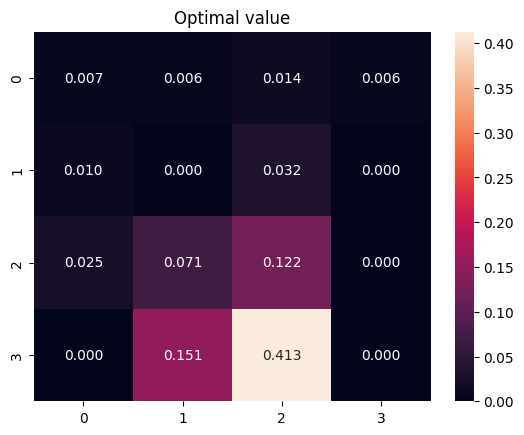

,0,1,2,3
0,0.0066,0.0062,0.0138,0.0061
1,0.0097,0.0000,0.0324,0.0000
2,0.0250,0.0708,0.1225,0.0000
3,0.0000,0.1506,0.4129,0.0000


In [29]:
df = pd.DataFrame(V.round(4).reshape(4, 4))
# df = (pd.DataFrame(V.reshape(8, 8))*1000).round(2)

sns.heatmap(df, annot=True, fmt = ".3f")
plt.title("Optimal value")
plt.show()

df